<a href="https://colab.research.google.com/github/jeydion/Capstone_Project_1/blob/master/In_Depth_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import hashlib
import os

Load Data:

Using books.csv, book_tags.csv, tags.csv files for this project. These three files contain all the information that the other two files contain plus much more. The data from all three of these csv files will be merged into a single dataframe organized by book titles.

In [0]:
books_url = 'https://raw.githubusercontent.com/jeydion/goodbooks-10k/master/books.csv'
books_df = pd.read_csv(books_url, index_col = 0)
books_df.head(2)

,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
book_id,,,,,,,,,,,,,,,,,,,,,
1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


In [0]:
book_tags_url = 'https://raw.githubusercontent.com/jeydion/Capstone_Project_1/master/book_tags.csv'
book_tags_df = pd.read_csv(book_tags_url, index_col = 0)
book_tags_df['goodreads_book_id'] = book_tags_df.index
book_tags_df = book_tags_df[['goodreads_book_id', 'tag_id', 'count']]
book_tags_df.tail()

,goodreads_book_id,tag_id,count
goodreads_book_id,,,
33288638,33288638,21303,7
33288638,33288638,17271,7
33288638,33288638,1126,7
33288638,33288638,11478,7
33288638,33288638,27939,7


In [0]:
tags_url = 'https://raw.githubusercontent.com/jeydion/Capstone_Project_1/master/tags.csv'
tags_df = pd.read_csv(tags_url, index_col = 0)
tags_df['tag_id'] = tags_df.index
tags_df = tags_df[['tag_id', 'tag_name']]
tags_df.tail()

,tag_id,tag_name
tag_id,,
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [0]:
tags_join_df = book_tags_df.merge(tags_df, on = 'tag_id', how='inner')
tags_join_df.columns

Index(['goodreads_book_id', 'tag_id', 'count', 'tag_name'], dtype='object')

In [0]:
books_with_tags_df = pd.merge(books_df, tags_join_df, left_on= 'best_book_id', right_on='goodreads_book_id', how='inner')
books_with_tags_df.head(2)

,goodreads_book_id_x,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id_y,tag_id,count,tag_name
0,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,30574,11314,to-read
1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11305,10836,fantasy


In [0]:
temp_df = books_with_tags_df.groupby('best_book_id')['tag_name'].apply(' '.join).reset_index()
temp_df.head()

,best_book_id,tag_name
0,1,to-read fantasy favorites currently-reading yo...
1,2,to-read fantasy favorites currently-reading yo...
2,3,to-read fantasy favorites currently-reading yo...
3,5,to-read fantasy favorites currently-reading yo...
4,6,to-read fantasy young-adult fiction harry-pott...


In [0]:
books_df = pd.merge(books_df, temp_df, left_on='best_book_id', right_on='best_book_id', how='inner')
books_df.head(3)

,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name
0,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,to-read fantasy favorites currently-reading yo...
1,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,to-read fantasy favorites currently-reading yo...
2,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,to-read fantasy favorites currently-reading yo...


In [0]:
books_df.columns

Index(['goodreads_book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url', 'tag_name'],
      dtype='object')

Data Clean Tasks:
remove columns [1,2,4,5,8,13,14,15,16,17,18,19,20,21]
change original_publication_year to just YYYY
parse non-english books and find english titles for text
eliminate redundant data (if any)
add mean, median, mode rating for each book
add genres (try adding with isbn API; incorporate top ten shelves per book from xml files)

In [0]:
# Remove columns [1,2,4,5,8,13,14,15,16,17,18,19,20,21]. These columns either contain duplicate or irrelevant information for this project

books_df.drop(books_df.columns[[1,2,4,5,8,13,14,15,16,17,18,19,20,21]], axis=1, inplace=True)
books_df.head()

,goodreads_book_id,books_count,authors,original_publication_year,title,language_code,average_rating,ratings_count,tag_name
0,2767052,272,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,to-read fantasy favorites currently-reading yo...
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,to-read fantasy favorites currently-reading yo...
2,41865,226,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",en-US,3.57,3866839,to-read fantasy favorites currently-reading yo...
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,to-read favorites currently-reading young-adul...
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,to-read favorites currently-reading young-adul...


In [0]:
#rename columns
books_df = books_df.rename(columns={'language_code': 'lang', 'original_publication_year': 'year'})

In [0]:
# Fill in missing book year values
books_df.loc[9688, 'year'] = 2006
books_df[books_df.year.isnull()].head(3)

,goodreads_book_id,books_count,authors,year,title,lang,average_rating,ratings_count,tag_name


# Missing Values

Found there are 21 NAN values in the Year column. Since the amount is so low, I will manually replace the nan values with the correct years.

There are 700 missing ISBNs from the DataFrame. Though there are methods for finding the missing values programatically. I have decided to drop these two columns from the DataFrame. According the isbn.org, each 10 or 13 digit number assigned to every book does not correspond with the genre. (https://www.isbn.org/faqs_general_questions). 

I will reference the books by their goodreads_book_id. This will help reference each book in the other dataframes that are attached to this dataset as well. 

There are 1084 books that have nan values for lang (book language) upon review of all the books, they are all in english and the nan value can be replaced with 'eng'

There are 67 books that are in Arabic and Persian, in which there might not be English translations or said translations aren't the version of the book the reviews are referring. It would be exceedingly difficult to compare the data with the english or english translation books

In [0]:
#Unique columns
books_df.lang.unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'vie', 'en', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [0]:
#Change all English books to 'eng'
books_df = books_df.replace({'lang' : { 'en-US': 'eng', 'en-CA': 'eng', 'en-GB': 'eng', 'en': 'eng'}})


In [0]:
# Analyze individual languages
# books_df[books_df.lang.isnull()]
books_df2 = books_df.lang.fillna('eng', inplace=True)
#books_df.head()

In [0]:
# dropped books
# Any books by BookRags; they make study guides and lesson plans based on books. 
books_df = books_df[books_df.authors != 'BookRags']

In [0]:
books_df = books_df[books_df.lang != 'ara']
books_df = books_df[books_df.lang != 'per']

In [0]:
nebooks_df = books_df[books_df.lang != 'eng']
# nebooks_df

In [0]:
books_df.lang.unique()

array(['eng', 'spa', 'fre', 'nl', 'por', 'ger', 'nor', 'jpn', 'vie',
       'ind', 'pol', 'tur', 'dan', 'fil', 'ita', 'swe', 'rum', 'mul',
       'rus'], dtype=object)

In [0]:
df = books_df.copy()

In [0]:
df.year = df.year.astype(int)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9689 entries, 0 to 9758
Data columns (total 9 columns):
goodreads_book_id    9689 non-null int64
books_count          9689 non-null int64
authors              9689 non-null object
year                 9689 non-null int64
title                9689 non-null object
lang                 9689 non-null object
average_rating       9689 non-null float64
ratings_count        9689 non-null int64
tag_name             9689 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 1.1+ MB


In [0]:
df.describe()

,goodreads_book_id,books_count,year,average_rating,ratings_count
count,9.689000e+03,9689.000000,9689.000000,9689.000000,9.689000e+03
mean,5.118851e+06,76.284240,1981.891423,4.002992,5.431499e+04
std,7.491680e+06,171.910376,152.130742,0.253690,1.584891e+05
min,1.000000e+00,1.000000,-1750.000000,2.470000,2.773000e+03
25%,4.510800e+04,23.000000,1990.000000,3.850000,1.368300e+04
50%,3.684680e+05,40.000000,2004.000000,4.020000,2.135800e+04
75%,8.709523e+06,67.000000,2011.000000,4.180000,4.127100e+04
max,3.328864e+07,3455.000000,2017.000000,4.820000,4.780653e+06


In [0]:
# Visual Data Exploration
%matplotlib inline

# Average rating for all books
df.average_rating.describe()

count    9689.000000
mean        4.002992
std         0.253690
min         2.470000
25%         3.850000
50%         4.020000
75%         4.180000
max         4.820000
Name: average_rating, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6978982c18>,
      dtype=object)

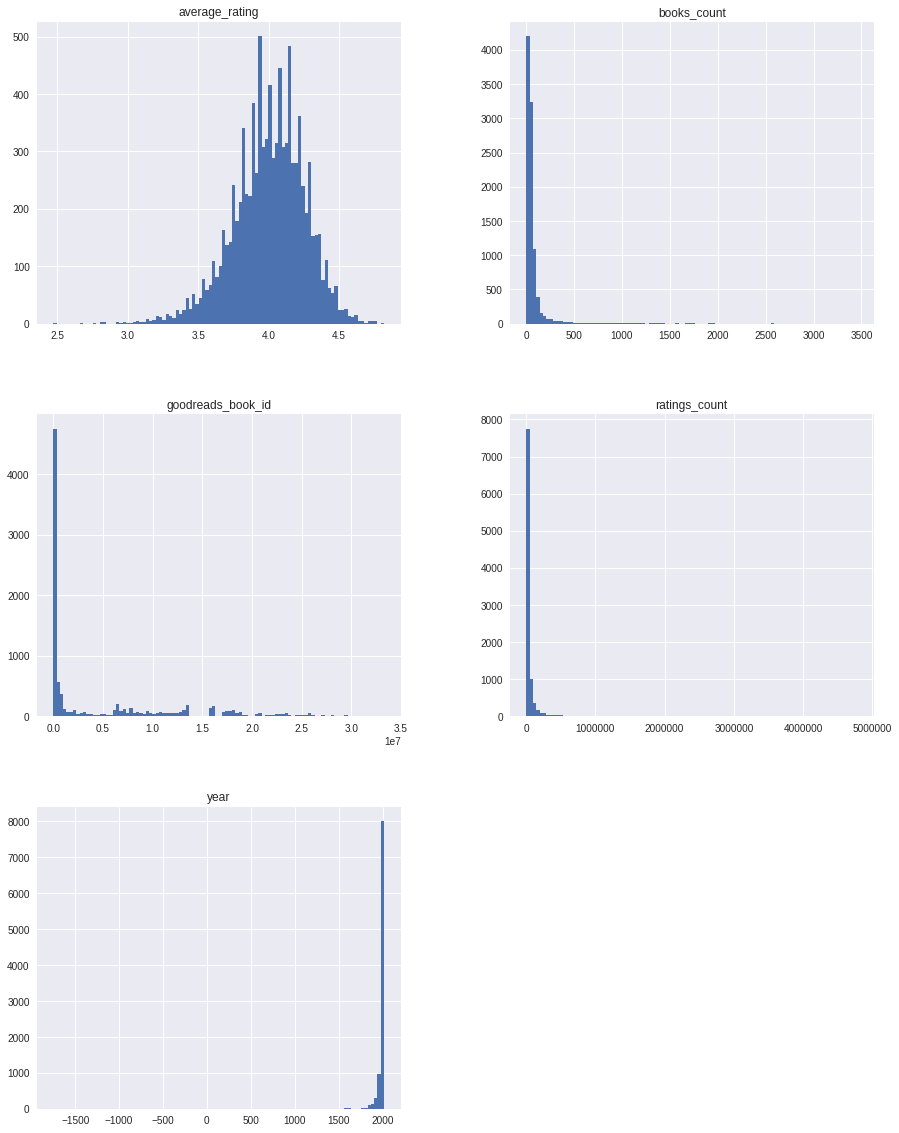

In [0]:
df.hist(bins=100, figsize= (15, 20))


Based on preliminary visual data exploration, it appears there is mean book rating is 4.00, slightly lower than the median 4.02. Many of the ratings_ catergories are tail heavy. These will be transformed later to have more of a bell shape. Below I will compare each ratings_ category with respect to the average book rating to see if there are any correllations.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


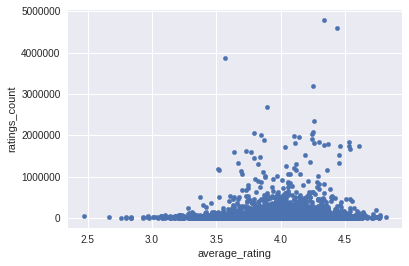

In [0]:
df.plot.scatter(x='average_rating', y='ratings_count')

No real insights can be made from comparing the average rating with each of the amount of ratings per book. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


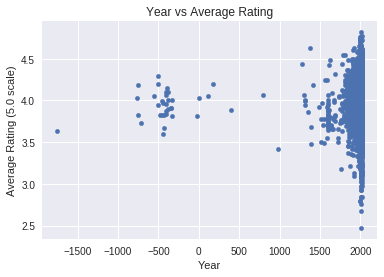

In [0]:
_ = df.plot.scatter(x='year', y='average_rating')
_ = plt.xlabel('Year')
_ = plt.ylabel('Average Rating (5.0 scale)')
_ = plt.title('Year vs Average Rating')
_ = plt.show()

In [0]:
df.to_csv('df.csv', index=False)
df.head()

<ol>Steps:
Ask the following questions and look for the answers using code and plots:
<li>Can you count something interesting?</li>
  <li>Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?</li>
  <li>Can you make a bar plot or a histogram?</li>
  <li>Can you compare two related quantities?</li>
  <li>Can you make a scatterplot?</li>
  <li>Can you make a time-series plot?</li>
<ul>Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?</ul></ol>


---
<ol>
  <li> Upon first looking at the data I have decided to remove many of the columns that were provided because most were either redundant or not relevant. Also, since I cannot link the book genre to the ISBN, I have decided to no longer pursue the goal of recommending books based outside their genre. Now I will look for other methods to recommend books. One method is by looking at the year or the average rating for a book in conjunction with the author.  </li>
  <li> Something interesting I did not expect is the year the book was released doesn't seem to be correlated with its average rating. It seems there is a wide range of average ratings and further analysis is needed to find additional correlations between book rating and year.</li>
  <li>I can make bar chart and histograms but as can be seen above, the information doesn't reveal much about the data. A scatter plot is much more useful in this situation.</li>
  <li> A scatter plot allows me to compare the year and average rating for each book. Of all the data presented in the original dataset, these two columns seem to be the most useful in my analysis.</li>
  <li> Though there is a wide range of time for the year column, there doesn't seem to be any correlation between year and book rating. However, it may be interesting to divide the books into time groups or periods and further compare the data.<li>
  <ul>H0: Most books rated are above 4.0 rating regardless of year. </ul>
  <ul>Most people want to read new books but don't know where to start. With a recommendation system such as this, people can now find books that are highly rated by other people and can trust that the book will pique their interest. A multitude of institutions can use this as well. A company like Amazon or Goodreads can recommend books to their users which will encourage more customer engagement with their respective brands. In the case of Amazon, this can lead to future sales. Though this dataset doesn't have all the information to make the perfect recommendation, it lays the groundwork for further developement. </ul>


# EDA

In [2]:
# Load cleaned dataset
df_url = 'https://raw.githubusercontent.com/jeydion/Capstone_Project_1/master/df.csv'
df = pd.read_csv(df_url, index_col = False)
df.head()

,goodreads_book_id,books_count,authors,year,title,lang,average_rating,ratings_count,tag_name
0,2767052,272,Suzanne Collins,2008,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,to-read fantasy favorites currently-reading yo...
1,3,491,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,to-read fantasy favorites currently-reading yo...
2,41865,226,Stephenie Meyer,2005,"Twilight (Twilight, #1)",eng,3.57,3866839,to-read fantasy favorites currently-reading yo...
3,2657,487,Harper Lee,1960,To Kill a Mockingbird,eng,4.25,3198671,to-read favorites currently-reading young-adul...
4,4671,1356,F. Scott Fitzgerald,1925,The Great Gatsby,eng,3.89,2683664,to-read favorites currently-reading young-adul...


In [0]:
df.authors.nunique()

4533

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


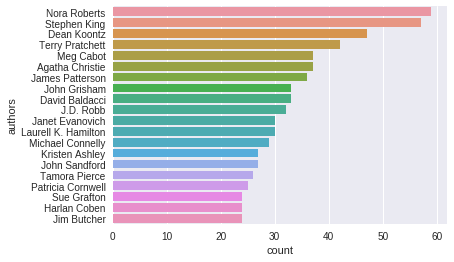

In [0]:
()_ = sns.countplot(y="authors",order=df['authors'].value_counts().iloc[:20].index, data=df)

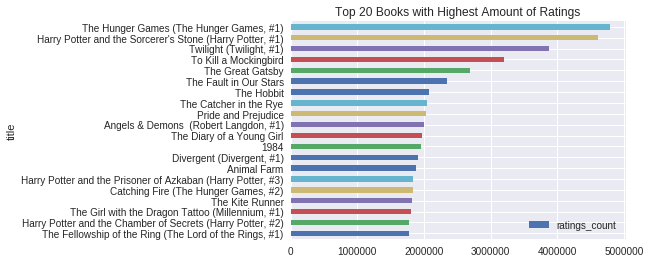

In [0]:
df_temp = df.sort_values(by='ratings_count', ascending=True).tail(20)
df_temp.plot.barh(x='title', y='ratings_count', title='Top 20 Books with Highest Amount of Ratings')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


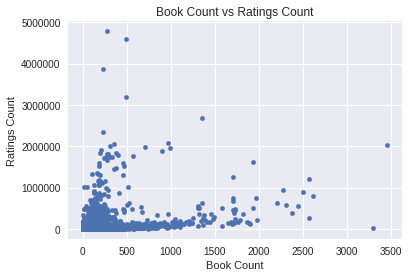

In [0]:
_ = df.plot.scatter(x='books_count', y='ratings_count')
_ = plt.xlabel('Book Count')
_ = plt.ylabel('Ratings Count')
_ = plt.title('Book Count vs Ratings Count')
_ = plt.show()

In [0]:
df.describe()

,goodreads_book_id,books_count,year,average_rating,ratings_count
count,9.689000e+03,9689.000000,9689.000000,9689.000000,9.689000e+03
mean,5.118851e+06,76.284240,1981.891423,4.002992,5.431499e+04
std,7.491680e+06,171.910376,152.130742,0.253690,1.584891e+05
min,1.000000e+00,1.000000,-1750.000000,2.470000,2.773000e+03
25%,4.510800e+04,23.000000,1990.000000,3.850000,1.368300e+04
50%,3.684680e+05,40.000000,2004.000000,4.020000,2.135800e+04
75%,8.709523e+06,67.000000,2011.000000,4.180000,4.127100e+04
max,3.328864e+07,3455.000000,2017.000000,4.820000,4.780653e+06


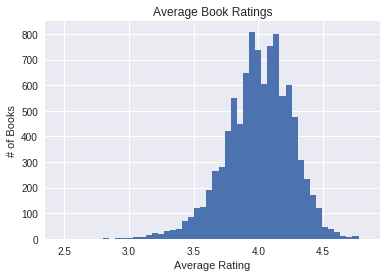

In [0]:
_ = plt.hist(df.average_rating, bins=50)
_ = plt.xlabel('Average Rating')
_ = plt.ylabel('# of Books')
_ = plt.title('Average Book Ratings')
_ = plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


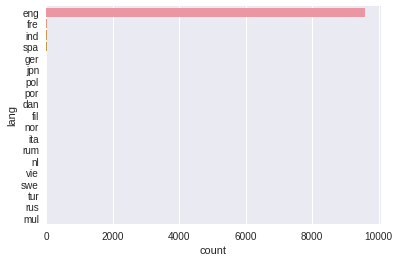

In [0]:
_ = sns.countplot(y="lang",order=df['lang'].value_counts().index, data=df)


In [0]:
#Spearman and Pearson Correlation Tests

from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [0]:
# books count vs ratings count
spearmanr(df.books_count, df.ratings_count)

SpearmanrResult(correlation=0.3866475377144219, pvalue=0.0)

In [0]:
# average rating vs ratings count
spearmanr(df.average_rating, df.ratings_count)

SpearmanrResult(correlation=0.07484136190471793, pvalue=1.6282945459948974e-13)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


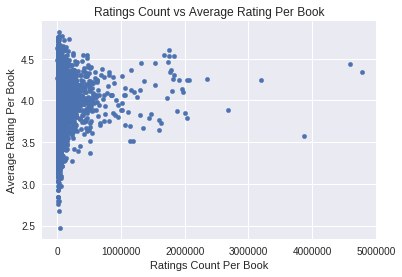

In [0]:
_ = df.plot.scatter(x='ratings_count', y='average_rating')
_ = plt.xlabel('Ratings Count Per Book')
_ = plt.ylabel('Average Rating Per Book')
_ = plt.title('Ratings Count vs Average Rating Per Book')
_ = plt.show()

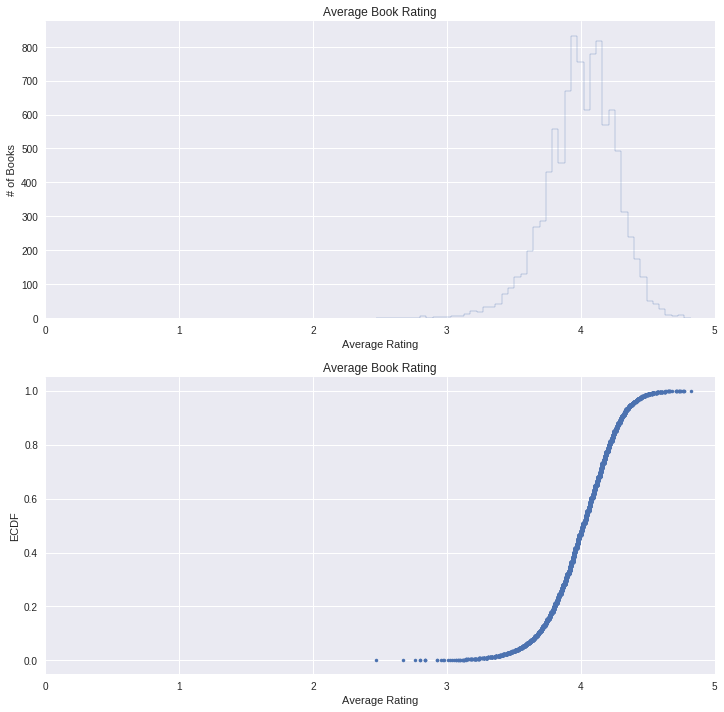

In [0]:
# Compute ecdfs
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)
    return x, y

x_ar, y_ar = ecdf(df.average_rating)

# Examine differences visually
fig = plt.figure(figsize=(12, 12))
_ = plt.subplot(2,1,1)
_ = plt.xlim([0, 5.0])
_ = plt.hist(df.average_rating, bins=50, histtype='step')
_ = plt.xlabel('Average Rating')
_ = plt.ylabel('# of Books')
_ = plt.title('Average Book Rating')

_ = plt.subplot(2,1,2)
_ = plt.plot(x_ar, y_ar, marker='.', linestyle='none')
_ = plt.xlim([0, 5.0])
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Average Rating')
_ = plt.title('Average Book Rating')

Based on the descriptive statistics and graphs, the average rating is very skewed to the right, with the vast majority of books rated above 3.5. This leads to speculation that there is a bias in reviews. That is to say, most people will review a book only if they really like it or really hate it. Since this dataset is from Goodreads Kaggle competition, it is more than likely that these books were already the most popular books on the site and as such their average ratings will be higher than the expected normal distribution. 

# In Depth Analysis

<p>In order to transform the text data to be utlized by machine learning algorithms, first the data must be transformed into numerical data. To do this, I will incorporate TF-IDF or Term Frequency- Inverse Document Frequency. This is one of the most common methods used in analyzing text information. Once the method has been implemented, I will then use cosine similarity in order to calculate a value that will respresent the similarity between two books. <p/>
<p>TF-IDF involved a two-part process in order to vectorize the text data. First, it counts the frequency of words within a document or body of text (commonly referred to as corpus when not dealing with an actual document). It stores the word frequency of document as a vector. Then, this is compared against how often a term appears across all documents or the corpus and is given a lower value the more frequenctly it appears. This gives less weight to words like "The", "and", "of" and the like in favor or proper nouns and verbs that better describe the text. In the case of this project, since the comparison is based on book titles, authors and genres, those proper nouns and verbs will be the primary factor in determining the similarity between books. This also helps solves the problem of the user-selected genre tags. Though the tags that are most common will be given less weight in the TD-IDF vector, the unique tags will still only have so much weight associated with them. For example, though many of the books will have the genre tag "fantasy" that will in turn place a lower value on the term "fantasy" itself, at least this will be reflected in all books with that tag. Tags such as "Best Book Ever" will have a higher weight but will not be similar to other tags so it will not be a major factor in the next step in the process, cosine similarity. <p/>
<p>Cosine similarity takes the cosine of the angle between to two vectors and using the dot product of two vectors produces a number from 0 to 1 with 1 being the most similarity. Cosine similarity algorithm will be applied to the vectors produced using TD-IDF to determine the similiarity between books. In order to get a wide range of options, the cosine similarity algorithm will be applied to different corpi from the dataset. I plan on applying it to the following columns individually; title, author, genre tags and then a corpus with all three included to see if the results for a particular set of books is consistent. In the long-term, when a user utilitizes this algorithm to find a similar book to a book that is not listed in this dataset, all the algorithm will have is a the title of the book. This could be improved upon if the user has to use this recommendation system on the Goodreads platform where the book will have more data associated with it for the algorithm to implement in the similarity calculations. <p/>

In [0]:
# Incorporate TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [0]:
# Load Cosine Similarity
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['authors']) #vectorize "authors" column
cosine_sim_a = linear_kernel(tfidf_matrix, tfidf_matrix)

In [31]:
cosine_sim_a

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Create a function that generates 20 books that are similar based on the cosine similarity score associated with each book author. This function can be used again when comparing different data outcomes from different text columns. 

In [0]:
# Build a 1-dimensional array with book titles
titles = df['title']
indices = pd.Series(df.index, index=df['title'])

# Function that get book recommendations based on the cosine similarity score of book authors
def authors_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_a[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [33]:
authors_recommendations("1984")

13                                            Animal Farm
2499                     Down and Out in Paris and London
6531                                         Burmese Days
9343                           Keep the Aspidistra Flying
2841                                    The Art of Loving
820                                    Animal Farm / 1984
3883                                  Homage to Catalonia
2326                          Love Story (Love Story, #1)
7103                                              Doctors
5877                                       Three Comrades
7047    Arch of Triumph: A Novel of a Man Without a Co...
35         A Game of Thrones (A Song of Ice and Fire, #1)
104        A Clash of Kings  (A Song of Ice and Fire, #2)
128        A Storm of Swords (A Song of Ice and Fire, #3)
157        A Feast for Crows (A Song of Ice and Fire, #4)
177     A Dance with Dragons (A Song of Ice and Fire, #5)
1444    A Storm of Swords: Blood and Gold (A Song of I...
1924    A Stor

The recommendation engine seems to be working adequately with the author's column being used for the cosine similarity score. The major issue is when a book title is typed in the function, it needs to be typed in exactly as it is listed in the Goodreads dataset. This leads to unneccesary errors. A method to fix this problem is currently being investigated and will be implemented once a solution is found. 

Next the 'tag-name' column will be vectorized and cosine similarity scores generated from that column will be used to find books that are similar. The same function that was used for authors can be used for tag-names. 

In [0]:
# Load Cosine Similarity
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['tag_name']) #vectorize "tag_name" column
cosine_sim_t = linear_kernel(tfidf_matrix, tfidf_matrix)

In [35]:
cosine_sim_t

array([[1.        , 0.23614628, 0.28292822, ..., 0.05029014, 0.07949614,
        0.01697119],
       [0.23614628, 1.        , 0.22421811, ..., 0.05256826, 0.07128068,
        0.0233914 ],
       [0.28292822, 0.22421811, 1.        , ..., 0.03322431, 0.04257365,
        0.01477645],
       ...,
       [0.05029014, 0.05256826, 0.03322431, ..., 1.        , 0.02605563,
        0.07164151],
       [0.07949614, 0.07128068, 0.04257365, ..., 0.02605563, 1.        ,
        0.07229502],
       [0.01697119, 0.0233914 , 0.01477645, ..., 0.07164151, 0.07229502,
        1.        ]])

In [0]:
# Build a 1-dimensional array with book titles
titles = df['title']
indices = pd.Series(df.index, index=df['title'])

# Function that get book recommendations based on the cosine similarity score of book tag-names
def tags_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_t[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [37]:
tags_recommendations('1984')

50                                  Brave New World
44                                   Fahrenheit 451
13                                      Animal Farm
27                                Lord of the Flies
66                                     Frankenstein
60                              Slaughterhouse-Five
7                            The Catcher in the Rye
784     Brave New World / Brave New World Revisited
89                       The Picture of Dorian Gray
164                              A Clockwork Orange
123                 One Flew Over the Cuckoo's Nest
820                              Animal Farm / 1984
152                              Great Expectations
78                             A Tale of Two Cities
374     The Strange Case of Dr. Jekyll and Mr. Hyde
58                                Wuthering Heights
6130                                      High-Rise
678                                   Mrs. Dalloway
193                               A Christmas Carol
107         

<p>The recommendation engine generated the a differnet list of books than that of the vectorized authors column.  The next attempt will be a corpus with the authors and tag_name columns combined. DIfferent results are not expected. However, an engine utilizing both text features of the data set instead of one should prove to be more robust for future deployment.</p>

In [0]:
df['corpus'] = (pd.Series(df[['authors', 'tag_name']]
                .fillna('')
                .values.tolist()
                ).str.join(' '))

In [0]:
tf_corpus = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_corpus = tf_corpus.fit_transform(df['corpus'])
cosine_sim_corpus = linear_kernel(tfidf_matrix_corpus, tfidf_matrix_corpus)

# Build a 1-dimensional array with book titles
titles = df['title']
indices = pd.Series(df.index, index=df['title'])

# Function that get book recommendations based on the cosine similarity score of book authors and tags
def corpus_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_corpus[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [40]:
corpus_recommendations("1984")

50                                  Brave New World
13                                      Animal Farm
44                                   Fahrenheit 451
27                                Lord of the Flies
820                              Animal Farm / 1984
7                            The Catcher in the Rye
9343                     Keep the Aspidistra Flying
123                 One Flew Over the Cuckoo's Nest
784     Brave New World / Brave New World Revisited
164                              A Clockwork Orange
60                              Slaughterhouse-Five
66                                     Frankenstein
89                       The Picture of Dorian Gray
152                              Great Expectations
107                                        Catch-22
1163                              The Invisible Man
58                                Wuthering Heights
257                            Flowers for Algernon
6130                                      High-Rise
758         

<p>Against previous assumptions, the recomendation engine that incorporated the vectorized corpus of authors and tag-names produced an entirely different list of books. There are some books that are on the previous lists but the list is far from identical. The list even has some differences with the tag-names engine. The corpus engine worked better than initial estimates. Most of the books recommended are from different genres. 

In [44]:
authors_recommendations("Harry Potter and the Sorcerer's Stone (Harry Potter, #1)")

20      Harry Potter and the Order of the Phoenix (Har...
22      Harry Potter and the Chamber of Secrets (Harry...
23      Harry Potter and the Goblet of Fire (Harry Pot...
24      Harry Potter and the Deathly Hallows (Harry Po...
26      Harry Potter and the Half-Blood Prince (Harry ...
2023    The Harry Potter Collection 1-4 (Harry Potter,...
3171    Harry Potter Boxed Set, Books 1-5 (Harry Potte...
17      Harry Potter and the Prisoner of Azkaban (Harr...
327                                    The Casual Vacancy
383                          The Tales of Beedle the Bard
404              Harry Potter Boxset (Harry Potter, #1-7)
3635         Harry Potter Collection (Harry Potter, #1-6)
5961    Harry Potter and the Order of the Phoenix (Har...
7295    Hogwarts: An Incomplete and Unreliable Guide (...
8765    Harry Potter Schoolbooks Box Set: Two Classic ...
6241    Short Stories from Hogwarts of Heroism, Hardsh...
7220    Short Stories from Hogwarts of Power, Politics...
240           

In [45]:
tags_recommendations("Harry Potter and the Sorcerer's Stone (Harry Potter, #1)")

17      Harry Potter and the Prisoner of Azkaban (Harr...
22      Harry Potter and the Chamber of Secrets (Harry...
26      Harry Potter and the Half-Blood Prince (Harry ...
24      Harry Potter and the Deathly Hallows (Harry Po...
23      Harry Potter and the Goblet of Fire (Harry Pot...
383                          The Tales of Beedle the Bard
3635         Harry Potter Collection (Harry Potter, #1-6)
20      Harry Potter and the Order of the Phoenix (Har...
1243                           Quidditch Through the Ages
451               Fantastic Beasts and Where to Find Them
404              Harry Potter Boxset (Harry Potter, #1-7)
5961    Harry Potter and the Order of the Phoenix (Har...
8765    Harry Potter Schoolbooks Box Set: Two Classic ...
2023    The Harry Potter Collection 1-4 (Harry Potter,...
3171    Harry Potter Boxed Set, Books 1-5 (Harry Potte...
265     Harry Potter and the Cursed Child - Parts One ...
352             The Subtle Knife (His Dark Materials, #2)
57            

In [46]:
corpus_recommendations("Harry Potter and the Sorcerer's Stone (Harry Potter, #1)")

22      Harry Potter and the Chamber of Secrets (Harry...
26      Harry Potter and the Half-Blood Prince (Harry ...
17      Harry Potter and the Prisoner of Azkaban (Harr...
24      Harry Potter and the Deathly Hallows (Harry Po...
23      Harry Potter and the Goblet of Fire (Harry Pot...
20      Harry Potter and the Order of the Phoenix (Har...
383                          The Tales of Beedle the Bard
3635         Harry Potter Collection (Harry Potter, #1-6)
1243                           Quidditch Through the Ages
404              Harry Potter Boxset (Harry Potter, #1-7)
2023    The Harry Potter Collection 1-4 (Harry Potter,...
5961    Harry Potter and the Order of the Phoenix (Har...
451               Fantastic Beasts and Where to Find Them
8765    Harry Potter Schoolbooks Box Set: Two Classic ...
3171    Harry Potter Boxed Set, Books 1-5 (Harry Potte...
265     Harry Potter and the Cursed Child - Parts One ...
6811    The Magical Worlds of Harry Potter: A Treasury...
352           

<p>The recommendation engines that were developed showed similarities in books associated with a given title. There are a few areas where the engine can be improved. As previously stated, the engine only works with this specific Goodreads dataset. Though this dataset has the top 10,000 books read on goodreads, it is still not every book on the platform. Thus, this engine needs to be improved to include all titles that are in the Goodreads database. If this recommendation engine is ever implemented on a site such as Goodreads, the corpus recommendation would be the top choice since it uses the most pertinant information about the books in tandem. </p>
<p> Another issue with the engine is that it may be too good at recommending similar books. The original thesis was to create an engine that would recommend books that were similar to the selected book but from different genres. Since authors and tag-name are the primary data used for this engine, it is difficult to see a solution that would purposely and accurately choose different tag-name books that are also similar. The original goal was the vectorized corpus would find similarities between different tag-names and authors that are not apparently to the naked eye. Further development in this area would lead to a more customizeable recommendation engine that could potentially utilitize filters.</p>
<p> This engine is easy to use but an app or web app integration would take the engine to the next level. By drastically improving the user experience this could lead to more use and in turn more data for the engine to consider. Goodreads could have this recommendation engine intergrated into their site on the User Account section that way people can get recommendations to books they have already read. 